<a href="https://colab.research.google.com/github/ChengZhenLi1/MAT-421/blob/main/HW%20for%2022.3-22.6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Numerical Error and Instability**

Accuracy and stability are two main issues to consider for the integration schemes for ODEs.

Accuracy: The ability of scheme to get the approximation as close as can be to the exact solution.

Instability: minimuming the error as integrating forward

<ipython-input-1-0a2bf2b2bfb7>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


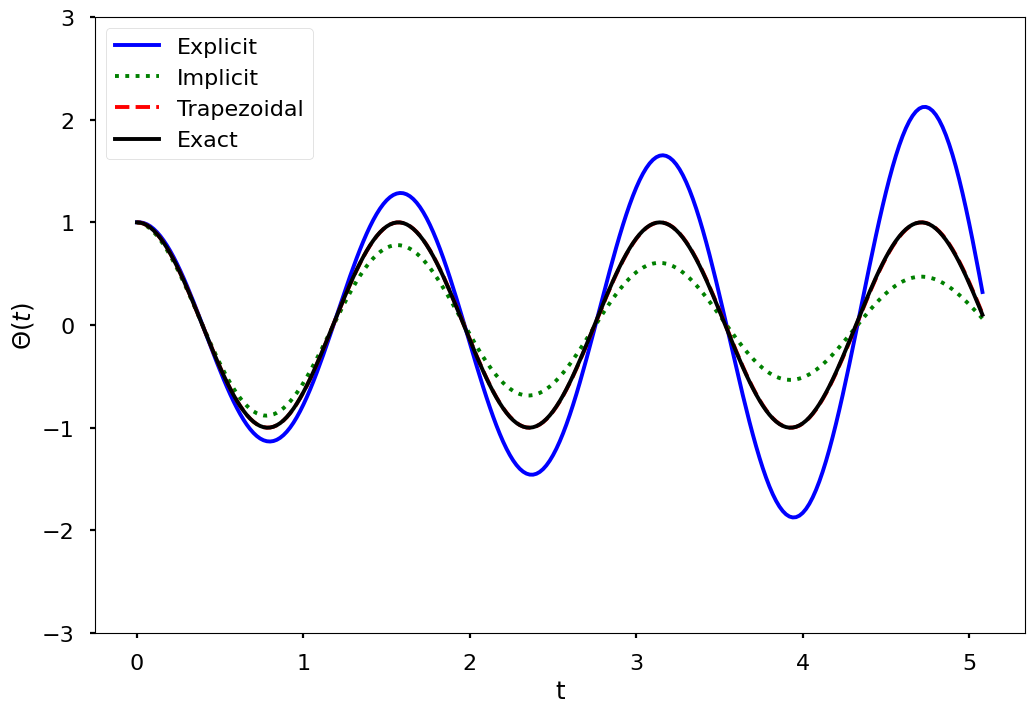

In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

%matplotlib inline 
# define step size
h = 0.02
# define numerical grid
t = np.arange(0, 5.1, h)
# oscillation freq. of pendulum
w = 4
s0 = np.array([[1], [0]])

m_e = np.array([[1, h], 
               [-w**2*h, 1]])
m_i = inv(np.array([[1, -h], 
               [w**2*h, 1]]))
m_t = np.dot(inv(np.array([[1, -h/2], 
    [w**2*h/2,1]])), np.array(
      [[1,h/2], [-w**2*h/2, 1]]))

s_e = np.zeros((len(t), 2))
s_i = np.zeros((len(t), 2))
s_t = np.zeros((len(t), 2))

# do integrations
s_e[0, :] = s0.T
s_i[0, :] = s0.T
s_t[0, :] = s0.T

for j in range(0, len(t)-1):
    s_e[j+1, :] = np.dot(m_e,s_e[j, :])
    s_i[j+1, :] = np.dot(m_i,s_i[j, :])
    s_t[j+1, :] = np.dot(m_t,s_t[j, :])
    
plt.figure(figsize = (12, 8))
plt.plot(t,s_e[:,0],'b-')
plt.plot(t,s_i[:,0],'g:')
plt.plot(t,s_t[:,0],'r--')
plt.plot(t, np.cos(w*t), 'k')
plt.ylim([-3, 3])
plt.xlabel('t')
plt.ylabel('$\Theta (t)$')
plt.legend(['Explicit', 'Implicit', \
            'Trapezoidal', 'Exact'])
plt.show()

**Predictor-Corrector and Runge Kutta Methods**

It's a method to improve the accuracy for the approximatrion by using predictor formula and the corrector formula.

Predictor formula: Estimate the solution t_(j+1) by using euler method.

Corrector method: using the midpoint method to calculate a more accurate method.

**Runge Kutta method**

It's a method to solve oridinary differential equation that's based on the truncated taylor series without computation of higher derivatives

k_1=F(t_j , S(t_j))

k_2=F(t_j+[h/2], S(t_j)+(1/2)k_1*h)

k_3=F(t_j+[h/2], S(t_j)+(1/2)k_2*h)

k_4=F(t_j+h, S(t_j)+k_3*h)

**Python ODE solvers**

<ipython-input-6-58cec9242658>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


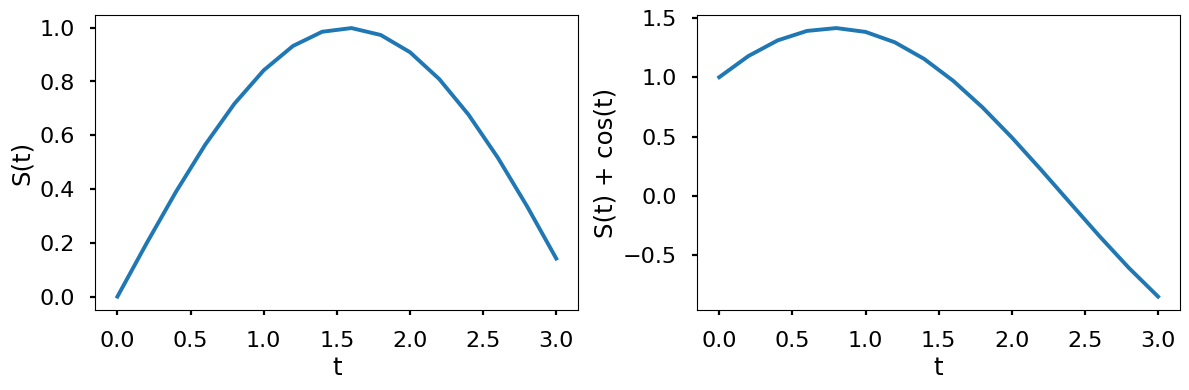

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

plt.style.use('seaborn-poster')

%matplotlib inline

F = lambda t, s: np.cos(t)

t_eval = np.arange(0, np.pi, 0.2)
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.cos(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()

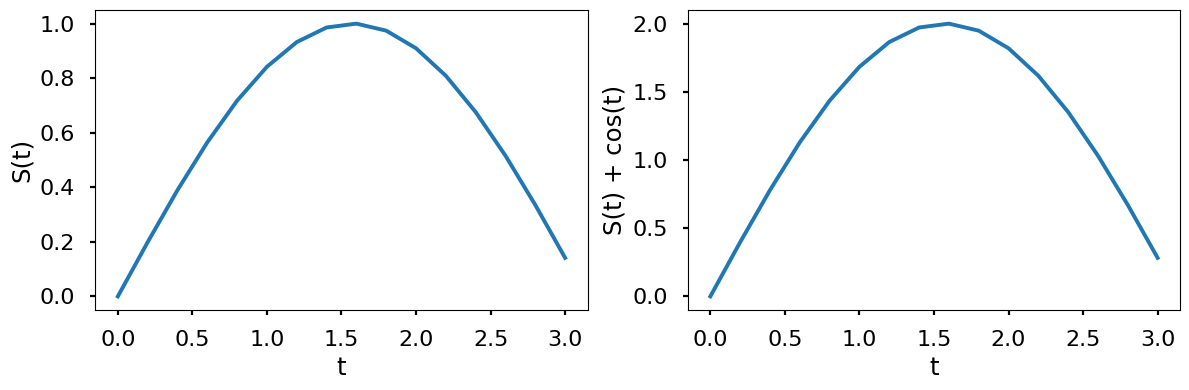

In [9]:
sol = solve_ivp(F, [0, np.pi], [0], t_eval=t_eval, \
                rtol = 1e-8, atol = 1e-8)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.subplot(122)
plt.plot(sol.t, sol.y[0] + np.sin(sol.t))
plt.xlabel('t')
plt.ylabel('S(t) + cos(t)')
plt.tight_layout()
plt.show()

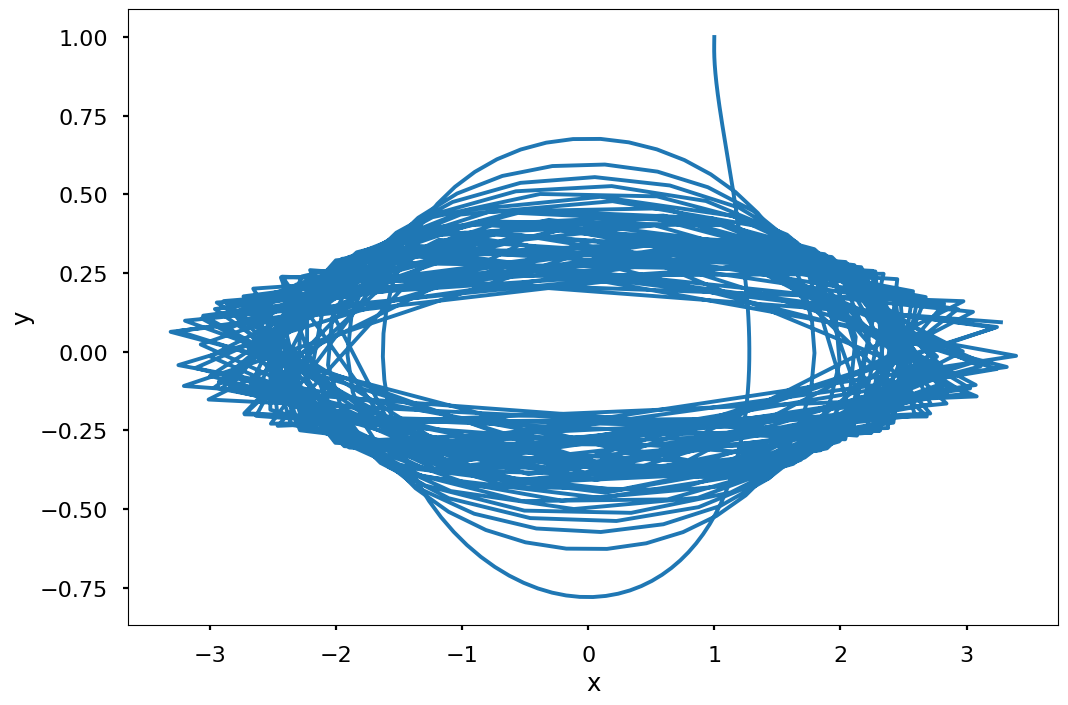

In [10]:

F = lambda t, s: np.dot(np.array([[0, t**3], [-t, 0]]), s)

t_eval = np.arange(0, 10.02, 0.02)
sol = solve_ivp(F, [0, 10], [1, 1], t_eval=t_eval)

plt.figure(figsize = (12, 8))
plt.plot(sol.y.T[:, 0], sol.y.T[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()